## freeCodeCamp Course - Data Analysis With Python
### A certification track

These are basic notes on how to use pandas. The data I used to demonstrate this is from StatKey (https://www.lock5stat.com/datapage3e.html 'RestaurantTips.csv'), and represents data on tip percentages compared to total bill amounts. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [5]:
data = pd.read_csv('RestaurantTips.csv')

In [7]:
data.shape

(157, 7)

In [8]:
data.info

<bound method DataFrame.info of       Bill    Tip Credit  Guests Day Server  PctTip
0    23.70  10.00      n       2   f      A    42.2
1    36.11   7.00      n       3   f      B    19.4
2    31.99   5.01      y       2   f      A    15.7
3    17.39   3.61      y       2   f      B    20.8
4    15.41   3.00      n       2   f      B    19.5
..     ...    ...    ...     ...  ..    ...     ...
152  31.30   5.70      y       3   m      B    18.2
153  12.57   2.00      n       3   m      B    15.9
154  14.87   3.13      n       2   m      B    21.0
155  51.68  10.00      y       6   m      B    19.3
156  17.12   2.50      n       2   m      B    14.6

[157 rows x 7 columns]>

In [15]:
data = pd.DataFrame(data)
data

,Bill,Tip,Credit,Guests,Day,Server,PctTip
0,23.70,10.00,n,2,f,A,42.2
1,36.11,7.00,n,3,f,B,19.4
2,31.99,5.01,y,2,f,A,15.7
3,17.39,3.61,y,2,f,B,20.8
4,15.41,3.00,n,2,f,B,19.5
...,...,...,...,...,...,...,...
152,31.30,5.70,y,3,m,B,18.2
153,12.57,2.00,n,3,m,B,15.9
154,14.87,3.13,n,2,m,B,21.0
155,51.68,10.00,y,6,m,B,19.3


In [16]:
data.describe()

,Bill,Tip,Guests,PctTip
count,157.000000,157.000000,157.000000,157.000000
mean,22.729045,3.849299,2.095541,16.619108
std,12.157234,2.420857,0.932212,4.386067
min,1.660000,0.250000,1.000000,6.700000
25%,15.190000,2.100000,2.000000,14.300000
50%,20.220000,3.350000,2.000000,16.200000
75%,28.840000,5.000000,2.000000,18.200000
max,70.510000,15.000000,7.000000,42.200000


### Numerical Analysis and Visualization

In [17]:
data['Bill'].describe()

count    157.000000
mean      22.729045
std       12.157234
min        1.660000
25%       15.190000
50%       20.220000
75%       28.840000
max       70.510000
Name: Bill, dtype: float64

A boxplot of the distribution of bill amounts, excluding tips. 

Salient takeaways:

- Approximately 50% of all orders had a bill amount between $15 and $28
- The largest bill amount recorded is $70.51
- The average bill amount is $22.72

<AxesSubplot:>

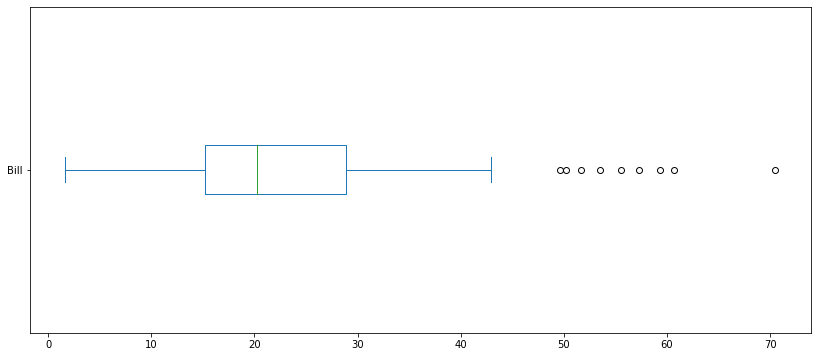

In [21]:
data['Bill'].plot(kind='box', vert=False, figsize=(14,6))

Below, a density (line) plot representing the same fairly-normal distribution.

<AxesSubplot:ylabel='Density'>

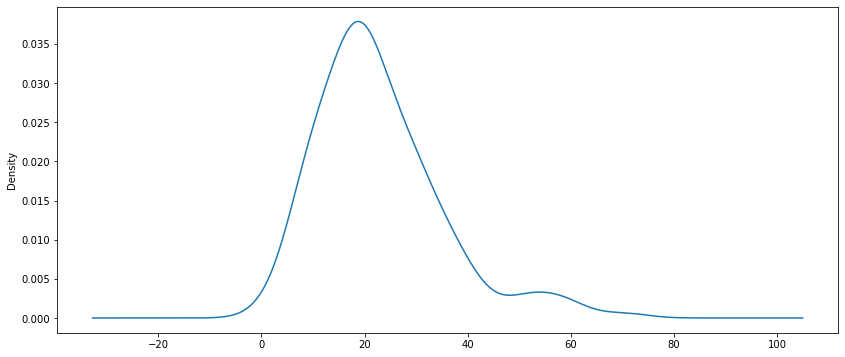

In [20]:
data['Bill'].plot(kind='density', figsize=(14,6))

The number of people who paid with credit card ('y') versus those who chose a different payment method ('n').

In [22]:
data['Credit'].value_counts()

n    106
y     51
Name: Credit, dtype: int64

Pie-chart visualization of the proportion of customers who paid with credit card. On the legend, 'y' represents payment with card, whereas 'n' represents a different payment method.

<AxesSubplot:ylabel='Credit'>

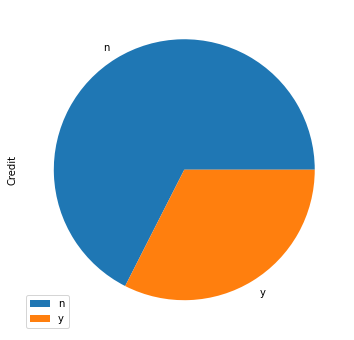

In [25]:
data['Credit'].value_counts().plot(kind='pie', figsize=(6,6), legend=True)

The number of parties that consisted of an amount of people 1-7:

In [23]:
data['Guests'].value_counts()

2    99
1    30
3    20
4     3
5     2
6     2
7     1
Name: Guests, dtype: int64

### Correlations

In [27]:
data['Server'].value_counts()

B    65
A    60
C    32
Name: Server, dtype: int64

In [29]:
data['PctTip'].describe()

count    157.000000
mean      16.619108
std        4.386067
min        6.700000
25%       14.300000
50%       16.200000
75%       18.200000
max       42.200000
Name: PctTip, dtype: float64

In [30]:
corr = data.corr()

corr

,Bill,Tip,Guests,PctTip
Bill,1.000000,0.915059,0.561037,0.135298
Tip,0.915059,1.000000,0.503960,0.486148
Guests,0.561037,0.503960,1.000000,0.077156
PctTip,0.135298,0.486148,0.077156,1.000000


Correlation between each feature in the dataset with one another.

- Blue represents positive correlation
- Red represents negetive correlation
- Strength of the color represents strength of correlation

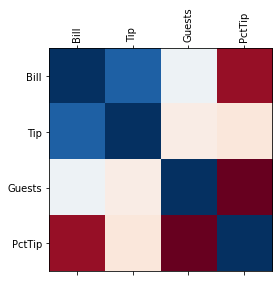

In [33]:
fig = plt.figure(figsize=(4,4))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);